In [69]:
# import all required libraries & packages to work on this project

In [70]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors

from math import sqrt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.externals import joblib

In [71]:
# Reading data using pandas
data=pd.read_csv("Concrete_Data.csv")

In [72]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [74]:
data.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [75]:
data.head(5)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [76]:
# Convert Age column values from int to float
data['Age']=data['Age'].astype(float)

In [77]:
data.head(5)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30


In [78]:
# Checking for skewness; skewness allowed to 0.5 hence need bto reduce the skewness
data.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [79]:
# Check null values using info() function or isnull() or notnull() method.
nullval=data.isnull().sum()
nullval

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [80]:
# chek for the datatypes of all columns after up-casting
data.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                 float64
CMS                 float64
dtype: object

In [81]:
# Check for the outliers by applying zscore
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1030, 9)
(981, 9)


In [82]:
# Separating target & input variables
import numpy as np
df_x=data_final.drop(columns=["CMS"])
y=data_final[["CMS"]]

In [83]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [84]:
# lets again check for skewness as its reduced now
x.skew()

Cement              0.508557
Blast               0.747827
Fly Ash             0.461726
Water              -0.017778
Superplasticizer    0.416828
CA                 -0.087932
FA                 -0.226214
Age                 1.940232
dtype: float64

In [85]:
data.shape

(1030, 9)

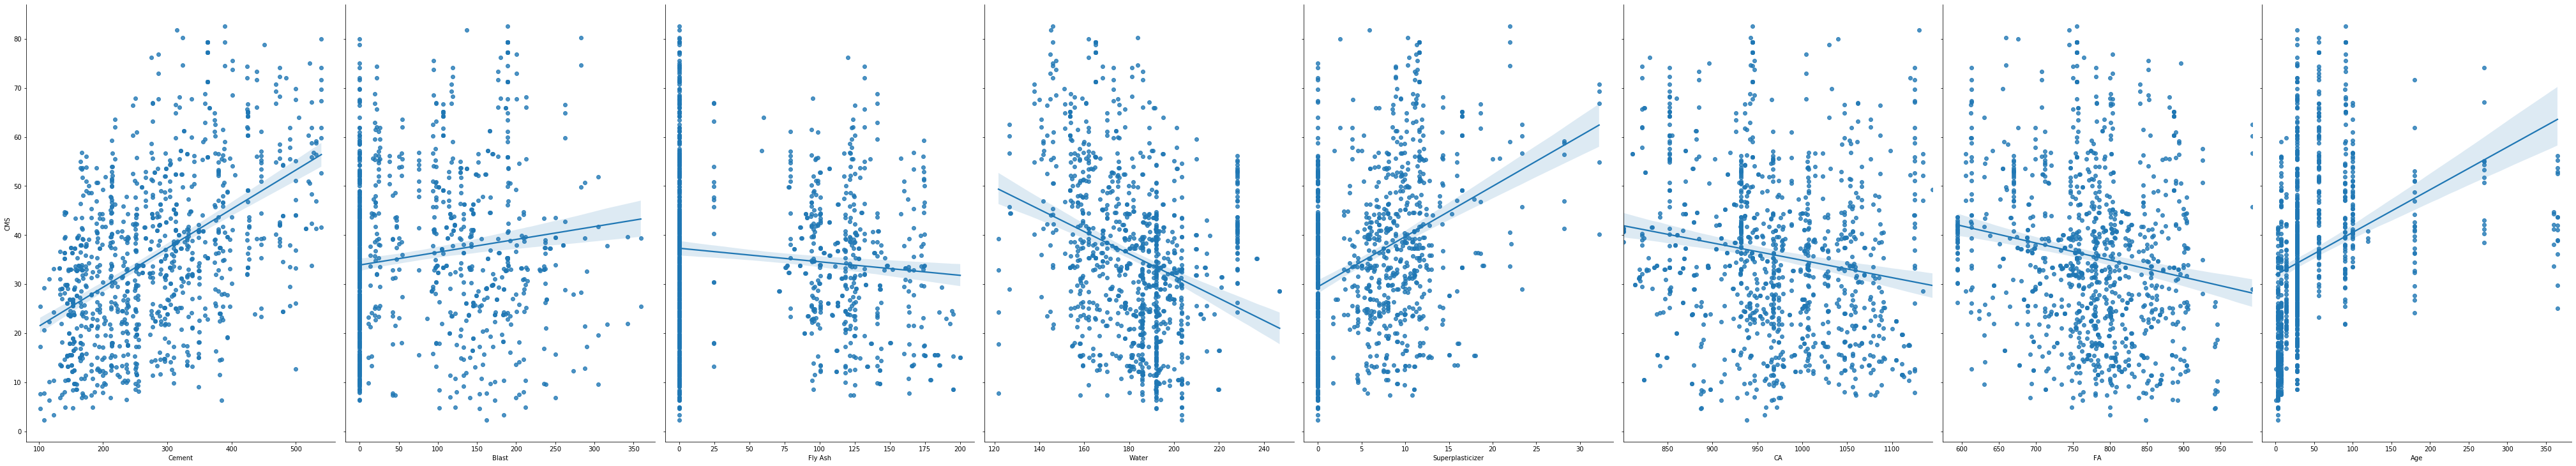

In [86]:
# draw Scatter plot for linear regression
# Column names hgaving strong relation - Cement , Superplasticizer , Age
sns.pairplot(data, x_vars=['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA', 'Age'], y_vars='CMS', size=10, aspect=0.7, kind='reg')
plt.show()

In [87]:
# Preparing X and y using pandas
# create a Python list of feature names

feature_cols =['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA', 'Age']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA', 'Age']]

# print the first 5 rows
X.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0


In [88]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1030, 8)


In [89]:
# select a Series from the DataFrame
y = data['CMS']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.CMS

# print the first 5 values
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: CMS, dtype: float64

In [90]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1030,)


In [91]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(772, 8)
(258, 8)
(772,)
(258,)


In [92]:
# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Interpreting model coefficients
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)
zip(feature_cols, linreg.coef_)

-31.917680633923077
[ 0.12666577  0.10914132  0.09459018 -0.12819427  0.34888624  0.01908373
  0.02111414  0.11685951]


In [94]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [95]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  8.585446273200665
Mean Sqr Error:    118.78652170903669
Root mean sqr error:  10.898922960964386


In [96]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.20)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.20)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)   

max r2 score corresponds to 83  is  0.6825472629453166


In [97]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,y_train)
    print(sv.score(X_train,y_train))

0.5933975738725966
0.4901888210471784
0.23817390983954378


In [98]:
# Check for which K value RMSE is lowest; here K=1 gives RMSE = 8.18

rmse_val = []      # to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test)   # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error)       # store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.18496024864169
RMSE value for k=  2 is: 8.422166509491024
RMSE value for k=  3 is: 8.583367298138725
RMSE value for k=  4 is: 8.645812045632155
RMSE value for k=  5 is: 8.639758089475665
RMSE value for k=  6 is: 9.016345489706563
RMSE value for k=  7 is: 9.346909519985571
RMSE value for k=  8 is: 9.56608120246785
RMSE value for k=  9 is: 9.738871664586858
RMSE value for k=  10 is: 9.87918807933102


In [99]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 62.25 %


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

X_train = X_train.astype('int')
X_test = X_test.astype('int')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

knn = KNeighborsClassifier(n_neighbors=1)
cv=10               
scoring='accuracy'
scores = cross_val_score(knn, X_train.values, y_train, cv=10, scoring='accuracy')
print(scores)

[0.25301205 0.21686747 0.18072289 0.21686747 0.2804878  0.2195122
 0.14634146 0.17073171 0.19512195 0.23170732]


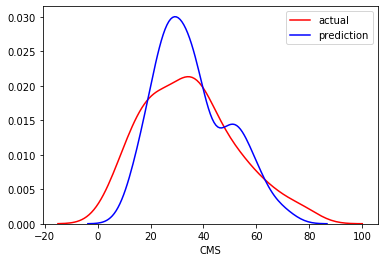

In [106]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

In [ ]:
Conclusion-
Finally r2score=68% & testing score 62% showing which is not very good after applying regression,cross validation technique for linear model.

Here Multivariate analysis done using scatter plot & below are the finding.
Strongly related with target - Cement , Superplasticizer , Age
Weakly related with target - Blast , Fly Ash
Very weekly related with target - Water , CA , FA  

Model suffering from overfitting.